# From Elder Futhark to Younger Futhark

## Introduction

This notebook intends to use computational tools to present what happened in the Scandinavian world to use an alphabet with 24 signs (*the Elder Futhark*) until the eigth century, then to use an alphabet with 16 signs. A reduction of 8 signs is not common in the history of scriptures in the world.


What do we call *Futhark*? This is the alphabet of Germanic peoples. The name comes from the 6 first runes of the runic scripture.

In [1]:
from runesanalyzer import data

The six first runes of the *Elder Futhark*

In [2]:
data.ELDER_FUTHARK[:6]

[ᚠ, ᚢ, ᚦ, ᚨ, ᚱ, ᚲ]

In [3]:
[rune.transcription for rune in data.ELDER_FUTHARK[:6]]

['f', 'u', 'þ', 'a', 'r', 'k']

The six first runes of the *Younger Futhark*

In [4]:
data.YOUNGER_FUTHARK[:6]

[ᚠ, ᚢ, ᚦ, ᚭ, ᚱ, ᚴ]

In [5]:
[rune.transcription for rune in data.YOUNGER_FUTHARK[:6]]

['f', 'u', 'þ', 'a', 'r', 'k']

In the Nordic area, there are almost no runic inscriptions found during the 8th century.

In [6]:
import codecs
import os
from runesanalyzer.scraper import retrieve_scandinavian_runic_text_database

In [7]:
retrieve_scandinavian_runic_text_database()

In [8]:
from runesanalyzer.reader import load_metadata

In [9]:
dated_inscriptions = {}
for line in load_metadata():
    if line["Period/Datering"]:
        dated_inscriptions[line["Signum"]] = line["Period/Datering"]


['Signum', 'Plats', 'Socken', 'Härad', 'Kommun', 'Placering', 'Koordinater', 'Urspr. plats?', 'Nuv. koord.', 'Sockenkod/Fornlämningsnr.', 'Runtyper', 'Korsform', 'Period/Datering', 'Stilgruppering', 'Ristare', 'Materialtyp', 'Material', 'Föremål', 'Övrigt', 'Alternativt signum', 'Referens', 'Bildlänk']


In [10]:
inscriptions_700 = {}
for i in dated_inscriptions:
    if "700" in dated_inscriptions[i]:
        inscriptions_700[i] = dated_inscriptions[i]
        print(i, "\t", dated_inscriptions[i])

Ög KJ59 U  	 U 520/530-700 (Imer 2007)
U HG1989;44 U  	 U 600-700 (Imer 2007)
Vr NOR1994;27 $U  	 U 520/530-560/570 (Imer 2007) ; U 550-700 (Fv 2011)
Bo Boije4 $  	 V 700-800-t
G 157   	 V 700-t
G 248   	 V 700-t
G 253 †SENTIDA  	 Sentida 1700-t(?)
G 268   	 V s 700-t - b 900-t
G 379 SENTIDA  	 Sentida 1700-t
DR 54 $SENTIDA  	 Sentida 1700-t(?)
DR 263 $  	 V 700-750 (DK Sk 5)
DR 357 $U  	 U 520/530-700 (Imer 2007)
DR 358 †$U  	 U 560/570-700 (Imer 2007)
DR 360 U  	 U 520/530-700 (Imer 2007)
DR EM85;151B $  	 V 700-750 (Imer 2007)
DR AUD1995;277 U  	 U 630-675/700 (Imer 2007)
DR DKFyn51   	 V 700-900
N 450 U  	 U ca 650 - ca 700
N KJ101 $U  	 U 650-700 (Grønvik)


In [11]:
def load_rundata():
    with codecs.open(os.path.join("data_runes", "RUNTEXTX"), "r", encoding="utf-8") as f:
        for line in f:
            yield line

for line in load_rundata():
    for i in inscriptions_700:
        if line[0] != "!":
            if line.startswith(i):
                print(line[len(i):])
                break

§A ekA sigimArAz Afs... §B ...kA rAisidokA stAinAz -... kk kiiii kkk... 

§A h-AhAhAukz Albu-- §B ...-nA 

--jþaahar farkano 

§PA fulk- §PB isuk §PC kilfihR §PD ftinun iþninufoi §QA fulki §QB Auk §QC kilfihR §QD iþ f tinuh tinu foiþu §RA fulk §RB isuk §RC kilfiAR §RD iþ ftinuA tinufoiþu 

...uþurfrataGR-u-a... 

...ik... 

¬ 

D-aRutDuþ 

¬ 

¬ 

§P ... RRRRRRRRRRRRRRRR -aþi tuk fauka fiaR sis in a iak asu þui launat ... auab-k sua fakat... §Q ... RRRRRRRRRRRRRRRR raþi tuk fauka fiaR sis in a iak asa þui launat ... auab-k sua fakat... 

§AP niuhAborumz niuhagestumz hAþuwolAfz gAf j hAriwolAfz mA--u snuh-e hidez runono felAh ekA hederA §AQ niu hAborumz niu hagestumz hAþuwolAfz gAf j hAriwolAfz mA--u snuh-e hidez runono felAh ekA hederA §B ginoronoz §C herAmAlAsAz ArAgeu welAdudsA þAt §D bAriutiþ 

§PA hAþuwolAfA §PB sAte §PC stAbA þria §PD fff §QA ... hAþuwolAfA §QB ... sAte §QC ... stAbA þria §QD fff 

§A hAidz runo ronu fAlAhAk hAiderA ginArunAz ArAgeu hAerAmAlAusz utiAz welAdAude sA

In [12]:
import re

def retrieve_inscriptions_by_period():
    dated_inscriptions = {}
    for line in load_metadata():
        if line["Period/Datering"]:
            dated_inscriptions[line["Signum"]] = line["Period/Datering"]
    return dated_inscriptions

def group_inscriptions_by_period():
    p = re.compile(r"^(?P<period>[UVM]) ")
    dated_inscriptions = retrieve_inscriptions_by_period()
    grouped_dated_inscriptions = {"U": [], "V": [], "M": []}
    for i, period in dated_inscriptions.items():
        m = p.search(period) 
        if m:
            global_period = m.group("period")
            grouped_dated_inscriptions[global_period].append(i)
    return grouped_dated_inscriptions

In [13]:
def get_century(period):
    p = re.compile(r"(?P<period>[0-9]{3,4})")
    m = p.search(period) 
    if m:
        year_period = m.group("period")
        return year_period
    else:
        return None
        
def get_approximative_period(period):
    p = re.compile(r"(?P<start_low>[0-9]{3,4})/(?P<start_high>[0-9]{3,4})-(?P<end_low>[0-9]{3,4})/(?P<end_high>[0-9]{3,4})")
    m = p.search(period) 
    if m:
        start_low, start_high, end_low, end_high = m.group("start_low"), \
        m.group("start_high"), m.group("end_low"), m.group("end_high")
        return start_low, start_high, end_low, end_high
    else:
        return None
    

def get_year_period(period):
    p = re.compile(r"(?P<start>[0-9]{3,4})-(?P<end>[0-9]{3,4})")
    m = p.search(period) 
    if m:
        start, end = m.group("start"), m.group("end")
        return start, end
    else:
        return None
    
    
def get_date(period):
    main_period = ""
    if len(period) == 1:
        return period
    if period[1] == " ":
        main_period = period[0]
        period = period[2:]
    res = get_approximative_period(period)
    if res:
        return str(int((int(res[3])+int(res[0]))/2))
    res = get_year_period(period)
    if res:
        return str(int((int(res[1])+int(res[0]))/2))
    res = get_century(period)
    if res:
        return res
    else:
        return main_period
    
    

In [14]:
get_century("V b 900-t")

'900'

In [15]:
get_approximative_period("U/V 560/570-775/800 (Imer 2007)")

('560', '570', '775', '800')

In [16]:
get_year_period("M 1175-1225")

('1175', '1225')

In [17]:
# aaa = 0
from collections import Counter
set_time = []
dated_inscriptions = {}
for line in load_metadata():
    if line["Period/Datering"].strip():
        set_time.append(get_date(line["Period/Datering"]))
    # if aaa > 30:
    #    break
    # aaa += 1
counter = Counter(set_time)


['Signum', 'Plats', 'Socken', 'Härad', 'Kommun', 'Placering', 'Koordinater', 'Urspr. plats?', 'Nuv. koord.', 'Sockenkod/Fornlämningsnr.', 'Runtyper', 'Korsform', 'Period/Datering', 'Stilgruppering', 'Ristare', 'Materialtyp', 'Material', 'Föremål', 'Övrigt', 'Alternativt signum', 'Referens', 'Bildlänk']


In [50]:
n = 100
sorted_counts = [i for i in counter.most_common(n) if i[0].isdigit() ]
sorted(sorted_counts, key=lambda x: int(x[0]))
sorted_dates = [i[0] for i in sorted_counts]
sorted_numbers = [i[1] for i in sorted_counts]

In [19]:
a = group_inscriptions_by_period()

['Signum', 'Plats', 'Socken', 'Härad', 'Kommun', 'Placering', 'Koordinater', 'Urspr. plats?', 'Nuv. koord.', 'Sockenkod/Fornlämningsnr.', 'Runtyper', 'Korsform', 'Period/Datering', 'Stilgruppering', 'Ristare', 'Materialtyp', 'Material', 'Föremål', 'Övrigt', 'Alternativt signum', 'Referens', 'Bildlänk']


In [35]:
# a['M']

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

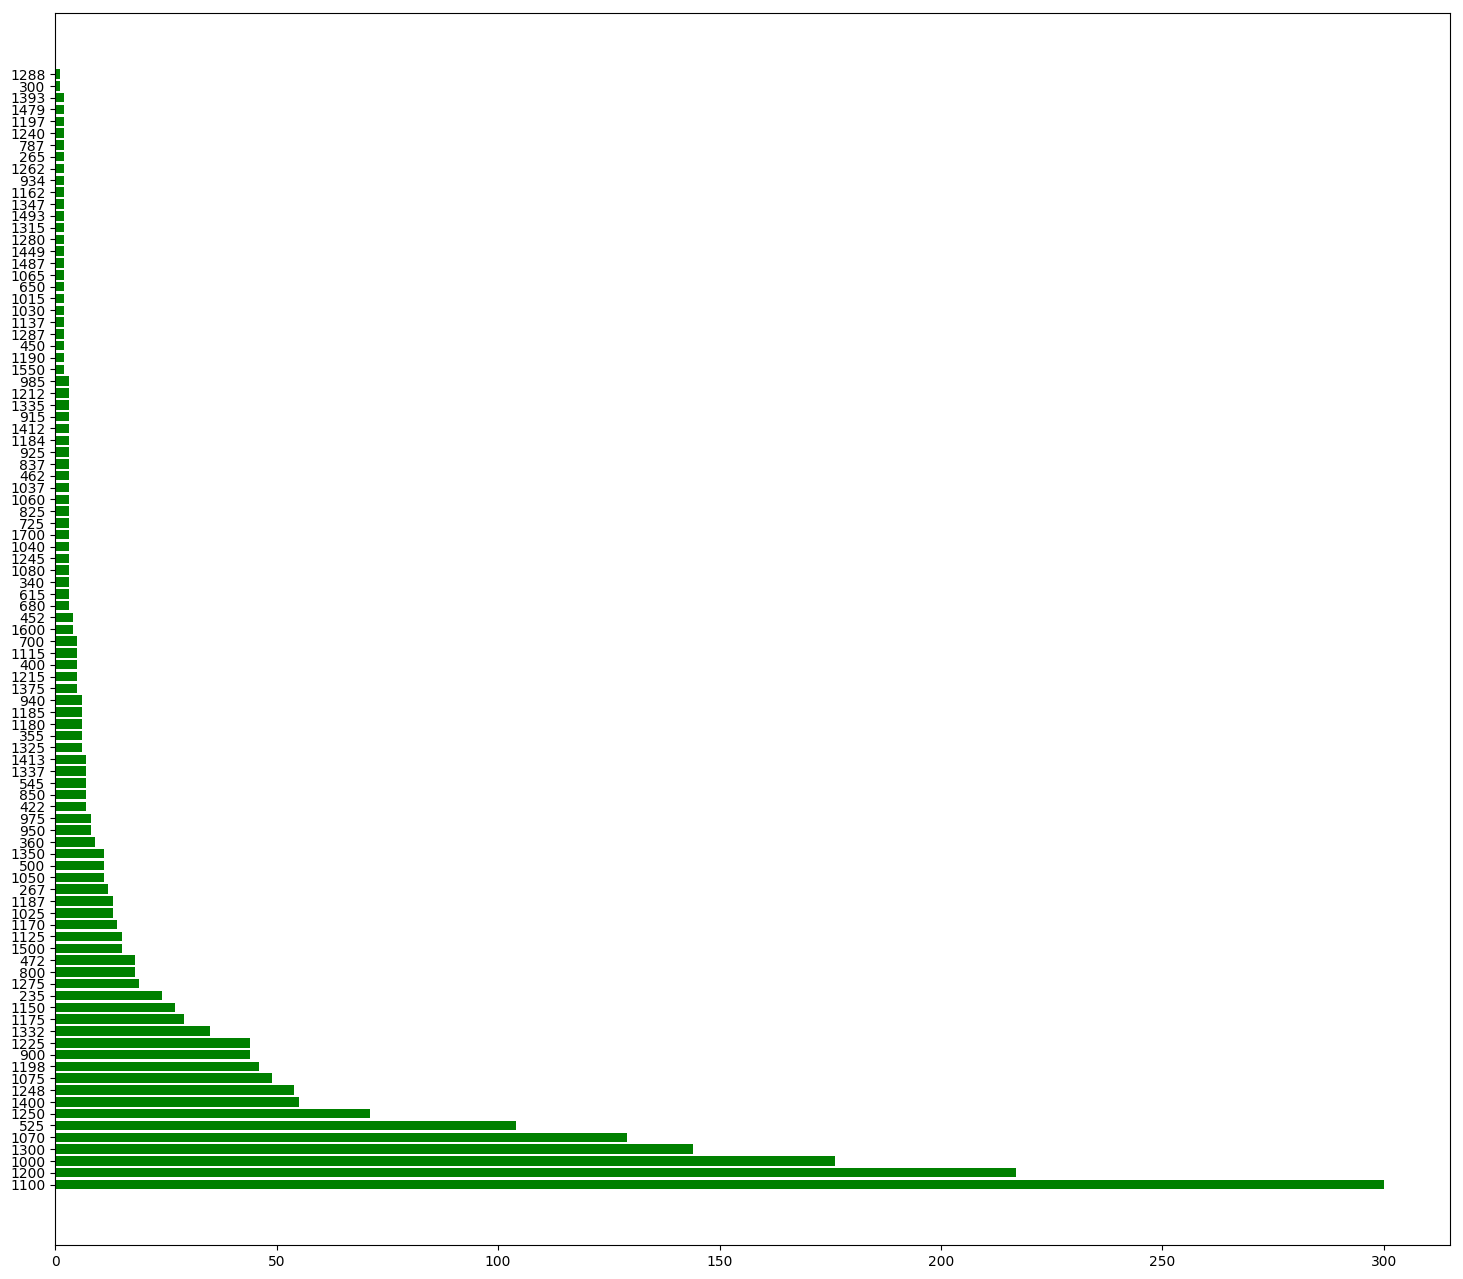

In [51]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(18, 16))

# Example data
y_pos = np.arange(max(sorted_numbers))

rects1 = ax.barh(sorted_dates, sorted_numbers, align='center',
        color='green', ecolor='black', label="Number of stanzas")

ax.set_yticks(sorted_dates)
ax.set_yticklabels(sorted_dates)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('')
ax.set_ylabel("")
ax.set_title('')

plt.show()

* Find transcriptions of runes which disappeared in the younger futhark
* Find positions in words of such runes

By Clément Besnier [www.clementbesnier.fr](www.clementbesnier.fr)